In [343]:
#this is opearational library

import os
import pandas as pd 
import numpy as np 

#this Library is used for visulization 
import seaborn as sns
import matplotlib.pyplot as plt


#sklearn library we have to select (LinearRegrssion,lasso,Ridge)

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# StatsModel

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  #QQplot
 
#this Librays are use from the re

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest

#avoid warnings
import warnings
warnings.filterwarnings("ignore")


import pickle
import json

# problem Statements......


## 2.Data Gathering

In [245]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [246]:
# The medical Insurance having 1338 rows × 7 columns

In [247]:
df.shape

(1338, 7)

In [248]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## EDA(Exploratory Data Analysis)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [250]:
df.describe()# ALL THE NNUMERIC CALUNMS STATS INFO WE GET

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### column1 ["age"]

In [251]:
df["age"]# age is the columns contain infomation about age of that person

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [252]:
df["age"].info()# int data tyoe

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: age
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


In [253]:
df["age"].isna().sum()

0

### column2 ["sex"]

In [254]:
df["sex"]# sex column having a catagorical data (order data) so we can do the order to it {male : 1, female : 0}

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [255]:
df["sex"].info()# dtpe is object  so we need to converted in to the numerical one fo that we use the method lable encoding

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [256]:
df["sex"].isna().sum()

0

In [257]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [258]:
df["sex"].value_counts().to_dict()# converted into the dictionary

{'male': 676, 'female': 662}

In [259]:
df["sex"].replace({'male': 1, 'female': 0},inplace = True)

In [260]:
#dictionary for sex_value
sex_values = {'male': 1, 'female': 0}# we are assigning one variable to the sex dictionary
sex_values

{'male': 1, 'female': 0}

## column 3 ["bmi"]

In [261]:
df["bmi"]      # bmi is nothing but the BODY MASS INDEX of that person

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [262]:
df["bmi"].info()# bmi index already in nummaric and having data type is float

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [263]:
df["bmi"].isna().sum()

0

In [264]:
df["bmi"].value_counts().to_dict()# we can check here numaric value is replace by any value(?)  or any thing

{32.3: 13,
 28.31: 9,
 30.495: 8,
 30.875: 8,
 31.35: 8,
 30.8: 8,
 34.1: 8,
 28.88: 8,
 33.33: 7,
 35.2: 7,
 25.8: 7,
 32.775: 7,
 27.645: 7,
 32.11: 7,
 38.06: 7,
 25.46: 7,
 30.59: 7,
 27.36: 7,
 24.32: 7,
 34.8: 7,
 27.5: 6,
 19.95: 6,
 29.92: 6,
 30.115: 6,
 26.6: 6,
 30.2: 6,
 35.53: 6,
 33.63: 6,
 28.595: 6,
 37.1: 6,
 31.73: 6,
 33.0: 6,
 27.74: 6,
 29.83: 6,
 25.175: 6,
 26.41: 6,
 27.835: 5,
 33.66: 5,
 28.9: 5,
 25.08: 5,
 28.5: 5,
 26.695: 5,
 23.21: 5,
 32.395: 5,
 31.825: 5,
 33.155: 5,
 29.64: 5,
 36.85: 5,
 25.3: 5,
 28.7: 5,
 23.655: 5,
 28.785: 5,
 29.7: 5,
 28.975: 5,
 34.2: 5,
 33.345: 5,
 26.03: 5,
 28.025: 5,
 26.315: 5,
 23.18: 5,
 30.4: 5,
 22.515: 5,
 25.84: 5,
 31.92: 5,
 30.78: 5,
 27.6: 5,
 34.105: 4,
 33.82: 4,
 34.21: 4,
 31.13: 4,
 21.85: 4,
 27.72: 4,
 33.915: 4,
 35.3: 4,
 20.235: 4,
 36.955: 4,
 30.5: 4,
 36.3: 4,
 27.265: 4,
 35.86: 4,
 29.735: 4,
 21.755: 4,
 30.02: 4,
 30.21: 4,
 36.08: 4,
 25.74: 4,
 27.93: 4,
 26.4: 4,
 33.44: 4,
 26.22: 4,
 27.1:

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


<AxesSubplot:>

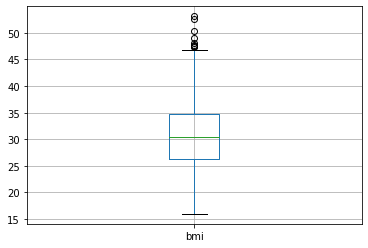

In [266]:
df[["bmi"]].boxplot()

In [269]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.50)
q3 = df["bmi"].quantile(0.75)

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
print(upper_tail)
print(lower_tail)
print(q2)

df["bmi"].loc[df["bmi"]>upper_tail] = upper_tail


47.290000000000006
13.7
30.4


<AxesSubplot:>

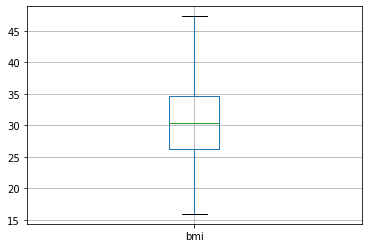

In [270]:
df[["bmi"]].boxplot()

### column 4 ["children"]

In [271]:
df["children"].info()# this column give u an information about the how many childern of the person nunmearical column

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: children
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


In [272]:
df["children"].isna().sum()

0

In [273]:
df["children"].value_counts().to_dict() # 1338 non-null   int64

{0: 574, 1: 324, 2: 240, 3: 157, 4: 25, 5: 18}

In [274]:
df["children"].isna().sum()

0

### column 5 ["smoker"]

In [275]:
df["smoker"]# this column give you the information about if the person is smoker or not

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [276]:
df["smoker"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: smoker
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [277]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [278]:
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [279]:
#smoker dictionary
smoker_values = {'no': 0, 'yes': 1}
smoker_values

{'no': 0, 'yes': 1}

In [280]:
df["smoker"].replace({'no': 0, 'yes': 1},inplace = True)
df["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

### column 6 ["region"]

In [281]:
df["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [282]:
df["region"].info()# object data type 

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: region
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


In [283]:
df["region"].isna().sum()

0

In [284]:
df["region"].value_counts()# nominal data so we are use get_dummies

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [285]:
df["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [286]:
df = pd.get_dummies(df,columns=  ["region"])

In [287]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [288]:
df.info()# we are converting all columns into the numeric one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [289]:
#we are doing feature enginerring 

### FEATURE ENGINEERING

### FEATURE SELECTION

In [290]:
df = df.select_dtypes(exclude="object")
x = df.drop(["charges"],axis = 1)
y = df["charges"]
x                   # independent variable

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [291]:
#target columns
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [292]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2,random_state=1)
print(x_test.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(268, 9)
(268, 9)
(1070,)
(268,)


### MODEL TRAINING

In [293]:
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [294]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.111930,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.044802,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.111930,0.044802,1.000000,0.013700,0.003146,0.198997,-0.138075,-0.135672,0.268556,-0.005087
children,0.042469,0.017163,0.013700,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003146,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198997,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138075,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135672,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.268556,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.005087,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

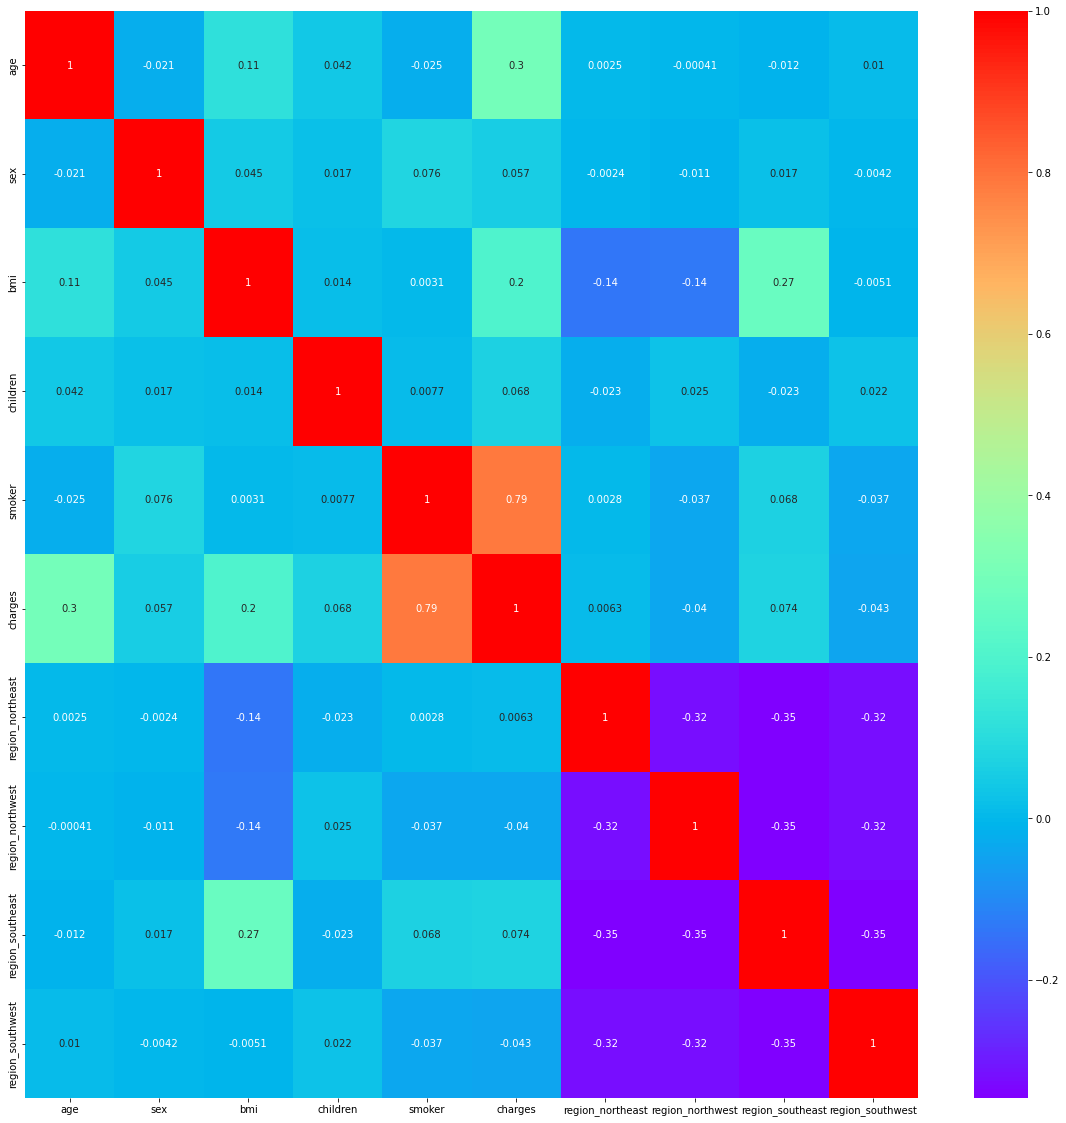

In [295]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True,cmap ="rainbow")

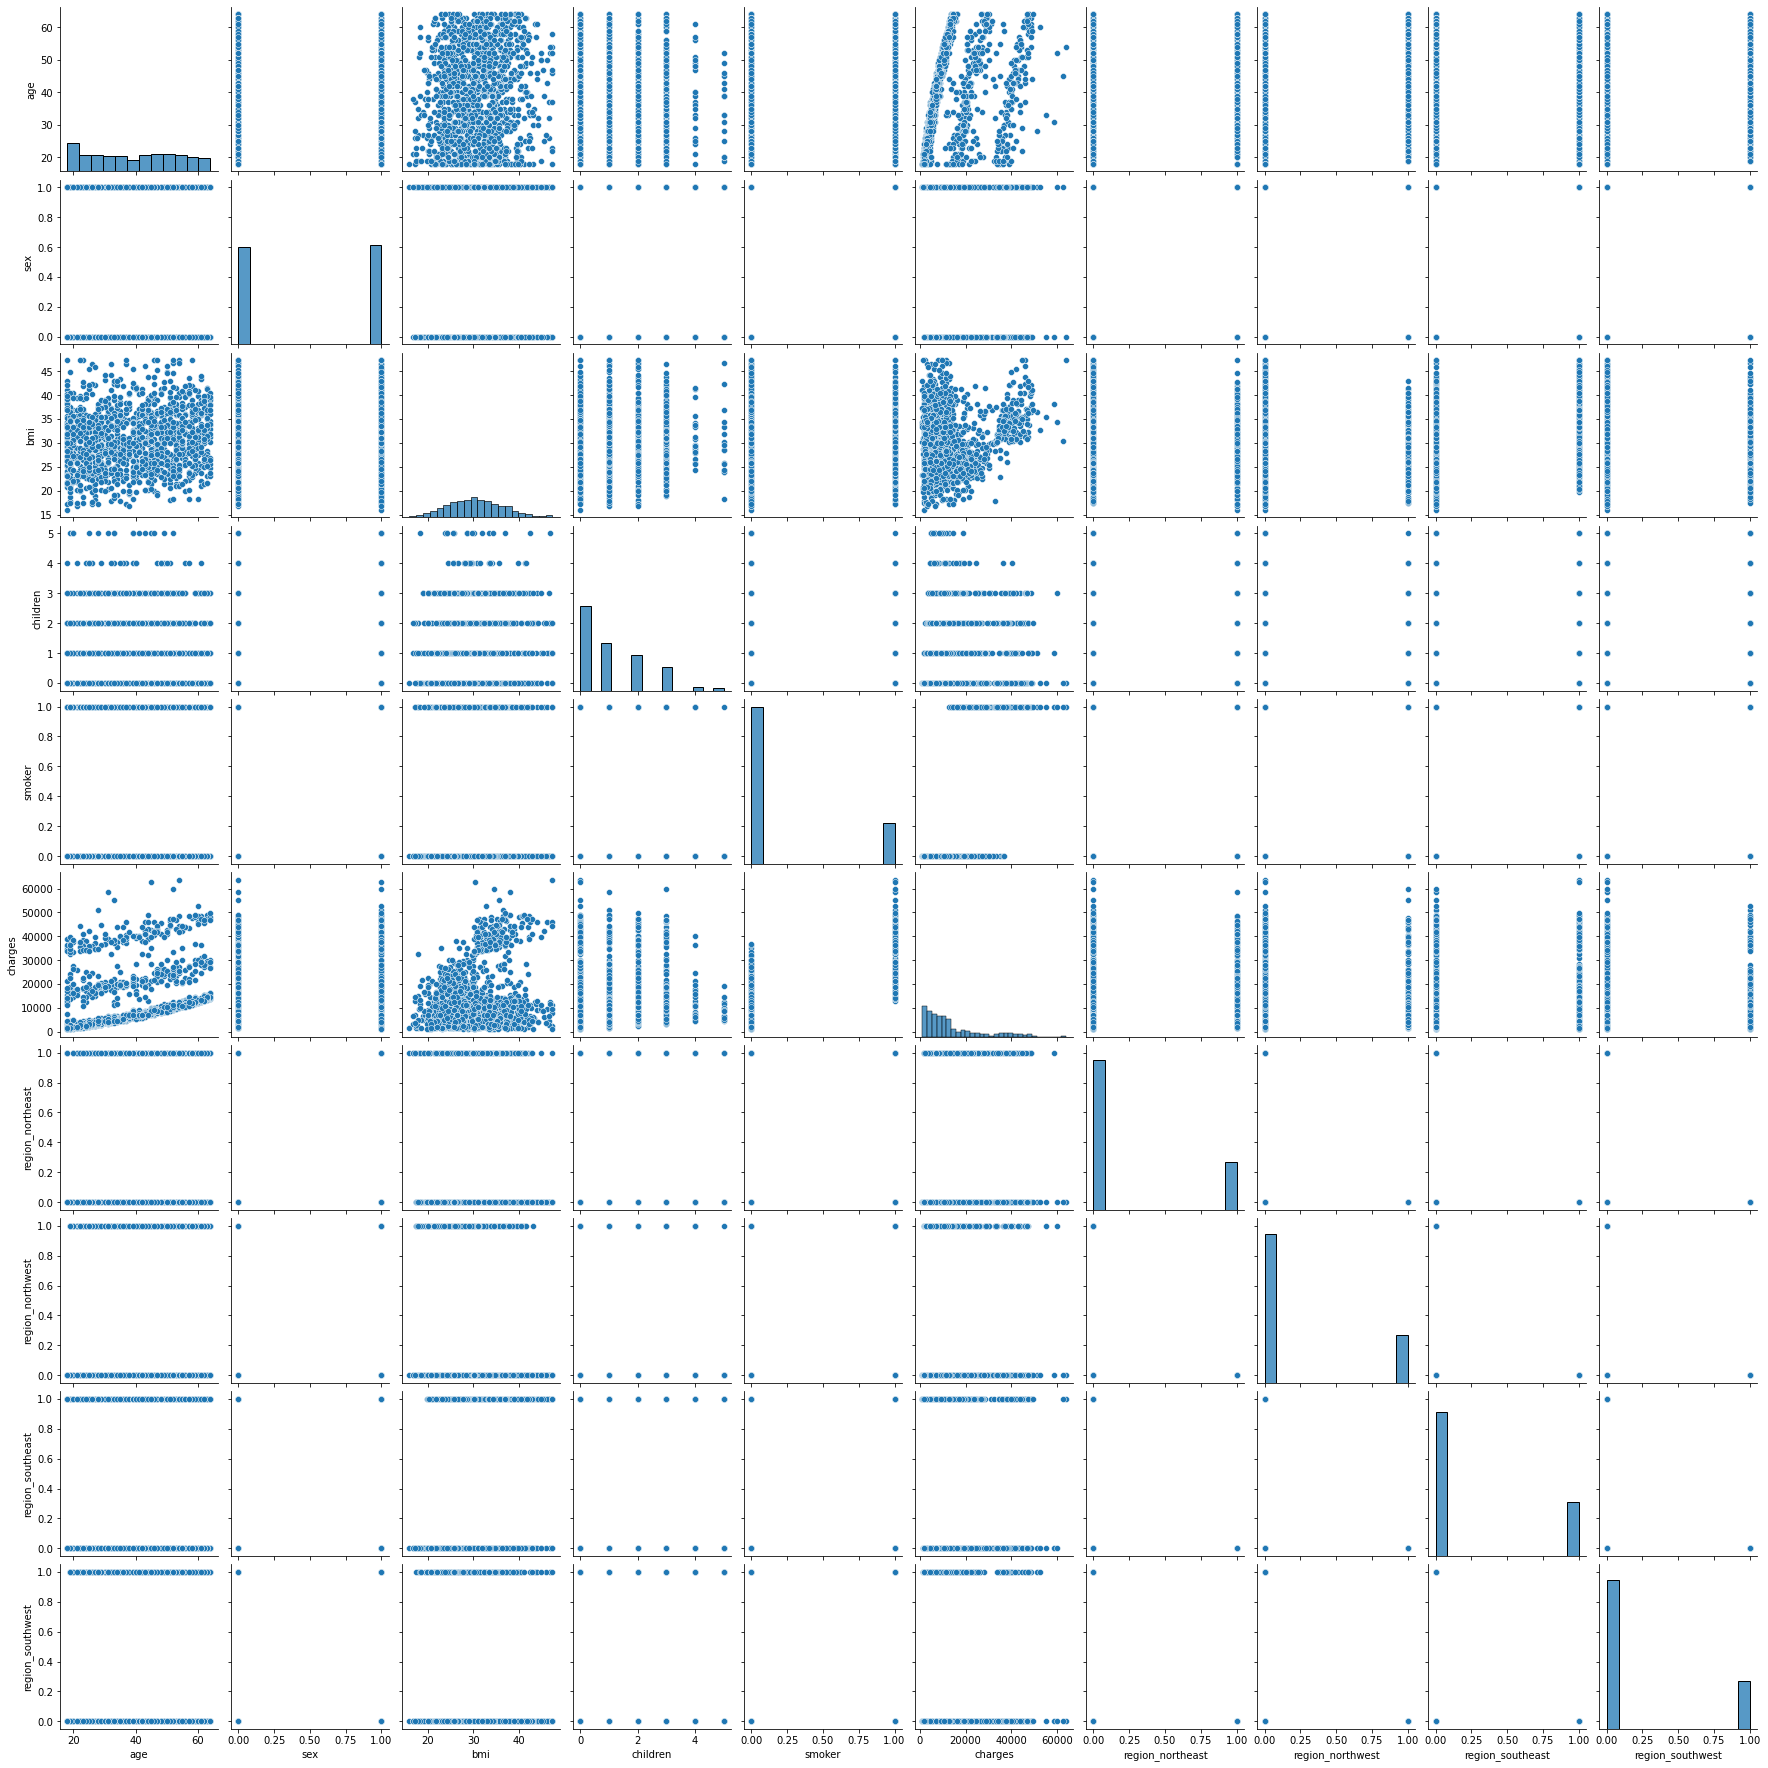

In [296]:
sns.pairplot(df)

Text(0, 0.5, "['charges_insurance']")

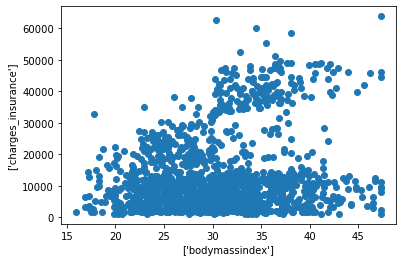

In [297]:
plt.scatter(df["bmi"],df["charges"])#scatted data no uniform
plt.xlabel(["bodymassindex"])
plt.ylabel(["charges_insurance"])

Text(0, 0.5, "['charges_insurance']")

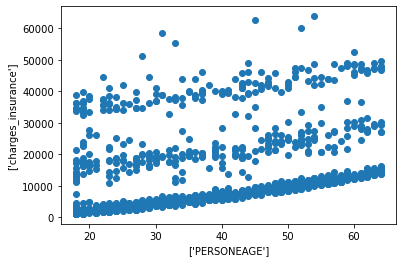

In [298]:
plt.scatter(df["age"],df["charges"])#scatted data no uniform
plt.xlabel(["PERSONEAGE"])
plt.ylabel(["charges_insurance"])

<AxesSubplot:xlabel='age', ylabel='charges'>

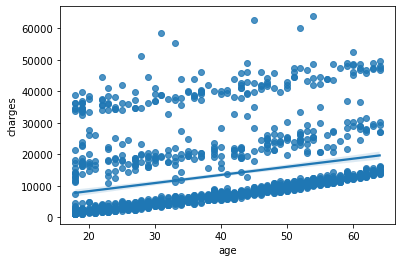

In [299]:
sns.regplot(x = "age", y = "charges", data = df)# bit linear but reidula get higher

### Evalution of Matrics

In [300]:
# Prediction on TRAINING DATA

y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test , y_pred_test)
print("MSE>>>>>>>",mse)

rmse = np.sqrt(mse)
print("\nRMSE>>>>>>>>",rmse)

mae= mean_absolute_error(y_test , y_pred_test)
print("\nMAE>>>>>",mae)

r2 = r2_score(y_test , y_pred_test)
print("\nr2>>>>>", r2)

adjr2 = adj_r2 = 1 - ((1 - r2) * (x_test.shape[0] - 1))/(x_test.shape[0] - x_test.shape[1] - 1)
print("\nADJ R2 score",r2)

MSE>>>>>>> 35451907.60161928

RMSE>>>>>>>> 5954.150451711754

MAE>>>>> 4057.119602619705

r2>>>>> 0.762515034138376

ADJ R2 score 0.762515034138376


In [301]:
#prediction on testing data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train ,y_pred_train)
print("MSE>>>>>>>",mse)

rmse = np.sqrt(mse)
print("\nRMSE>>>>>>>>",rmse)

mae= mean_absolute_error(y_train ,y_pred_train)
print("\nMAE>>>>>",mae)

r2 = r2_score(y_train ,y_pred_train)
print("\nr2>>>>>", r2)


adjr2 = adj_r2 = 1 - ((1 - r2) * (x_train.shape[0] - 1))/(x_train.shape[0] - x_train.shape[1] - 1)
print("\nADJ R2 score",r2)

MSE>>>>>>> 36776223.84482629

RMSE>>>>>>>> 6064.340347047343

MAE>>>>> 4173.033739133614

r2>>>>> 0.7478471403663335

ADJ R2 score 0.7478471403663335


<AxesSubplot:>

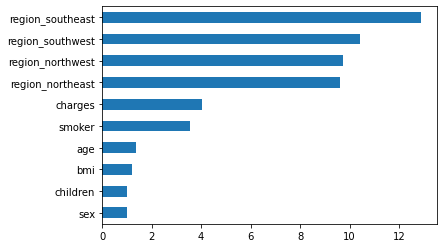

In [302]:
#variation infulation factor
df1 = df
vif_list = []
for i in range(len(df1.columns)):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
df2 = pd.Series(vif_list,index = df.columns)
df2.sort_values().plot(kind = "barh")

## Single row testing

In [303]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [304]:
df.head(1).T

,0
age,19.000
sex,0.000
bmi,27.900
children,0.000
smoker,1.000
charges,16884.924
region_northeast,0.000
region_northwest,0.000
region_southeast,0.000
region_southwest,1.000


In [334]:
age = 19.000
sex = "female"
bmi = 27.900
children = 0.000
smoker = "yes"
region = "southwest"


In [335]:
sex_values
smoker_values


{'no': 0, 'yes': 1}

In [336]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [337]:
region_col = "region_" + region
region_col

'region_southwest'

In [338]:
index= np.where(column_names == region_col)[0][0]
index

8

In [339]:
array = np.zeros(len(column_names),dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [340]:
array[0] = age
array[1] = sex_values[sex]
array[2] = bmi
array[3] = children
array[4] = smoker_values[smoker]
array[index] = 1


In [341]:
array

array([19,  0, 27,  0,  1,  0,  0,  0,  1])

In [342]:
predicted_insurance = model.predict([array])
print("insurance_prediced",predicted_insurance)

insurance_prediced [25160.358974]


In [344]:
with open("Linear_regression.pkl","wb")as f:
    pickle.dump(model,f)

In [346]:
project_data = {"sex" : sex_values,
                "smoker" : smoker_values,
                "columns" : list(column_name)
    
}
project_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'charges',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [347]:
with open("project_data.json","w") as f:
    json.dump(project_data,f)

In [ ]:
# sex_values = {'male': 1, 'female': 0}
# smoker_values = {'no': 0, 'yes': 1}

# get_dum_dict = {'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}